# A Sample of Evaluating a Trained Model

In [66]:
import torch
import numpy as np
import argparse
import matplotlib.pyplot as plt
from main import model_prepare, cluster_tsp_solver
from visualisation import plot_the_clustering_2d, plot_the_clustering_2d_with_cycle

## Load some arguments

In [67]:
args = argparse.Namespace()
args.model_type = 'moe_mlp'
args.clusters_num = 3
args.n_component = 3
args.city_num = 100
args.feature_dim = 2
args.hidden_dim = 128
args.train = False
args.eval = True

First, we need two principe inputs for this evaluation procedure: the trained model and the evaluation sample.

We'll start with the trained model. you may feel free to try your own trained model by replacing the below directory to the one of your model.

In [68]:
args.eval_dir = 'trained_sessions/moe_mlp/rand_50-3/trained_model/batch18400.pt'
model = model_prepare(args)

After loaded the model to evaluate, we'll move on to the data.

In [69]:
x = torch.rand([1, 100, 2])

Let's see what is the data like with data visualisation

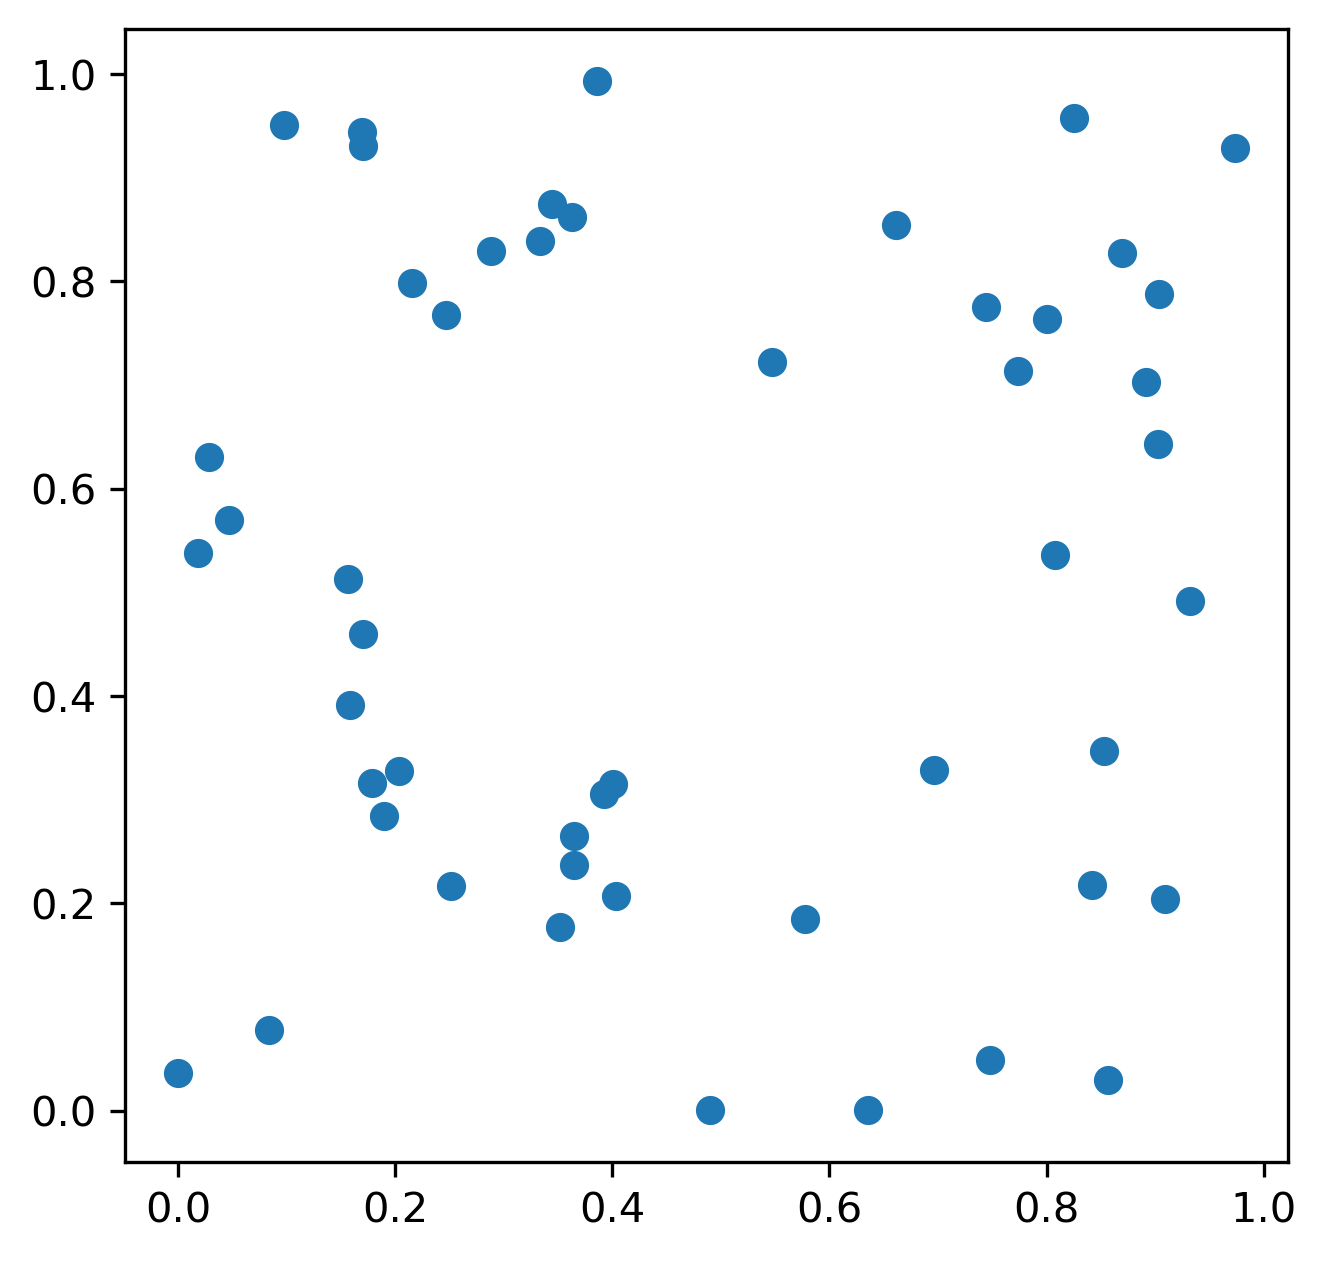

In [70]:
plt.figure(figsize=[5.0, 5.0], dpi=300.0)
plt.scatter(x[0, :, 0], x[0, :, 1])
plt.savefig('//Users/masong/taskpoints.eps', format='eps')

In [71]:
a, logits, log_sample = model(x)

pi, c_d, c_d_origin, degeneration_flag = cluster_tsp_solver(args.clusters_num, m=0, a=a, x=x, degeneration_penalty=10.0)


/Users/masong/PycharmProjects/GNNClustering/visualisation.py:85: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  clusters_fig.show()


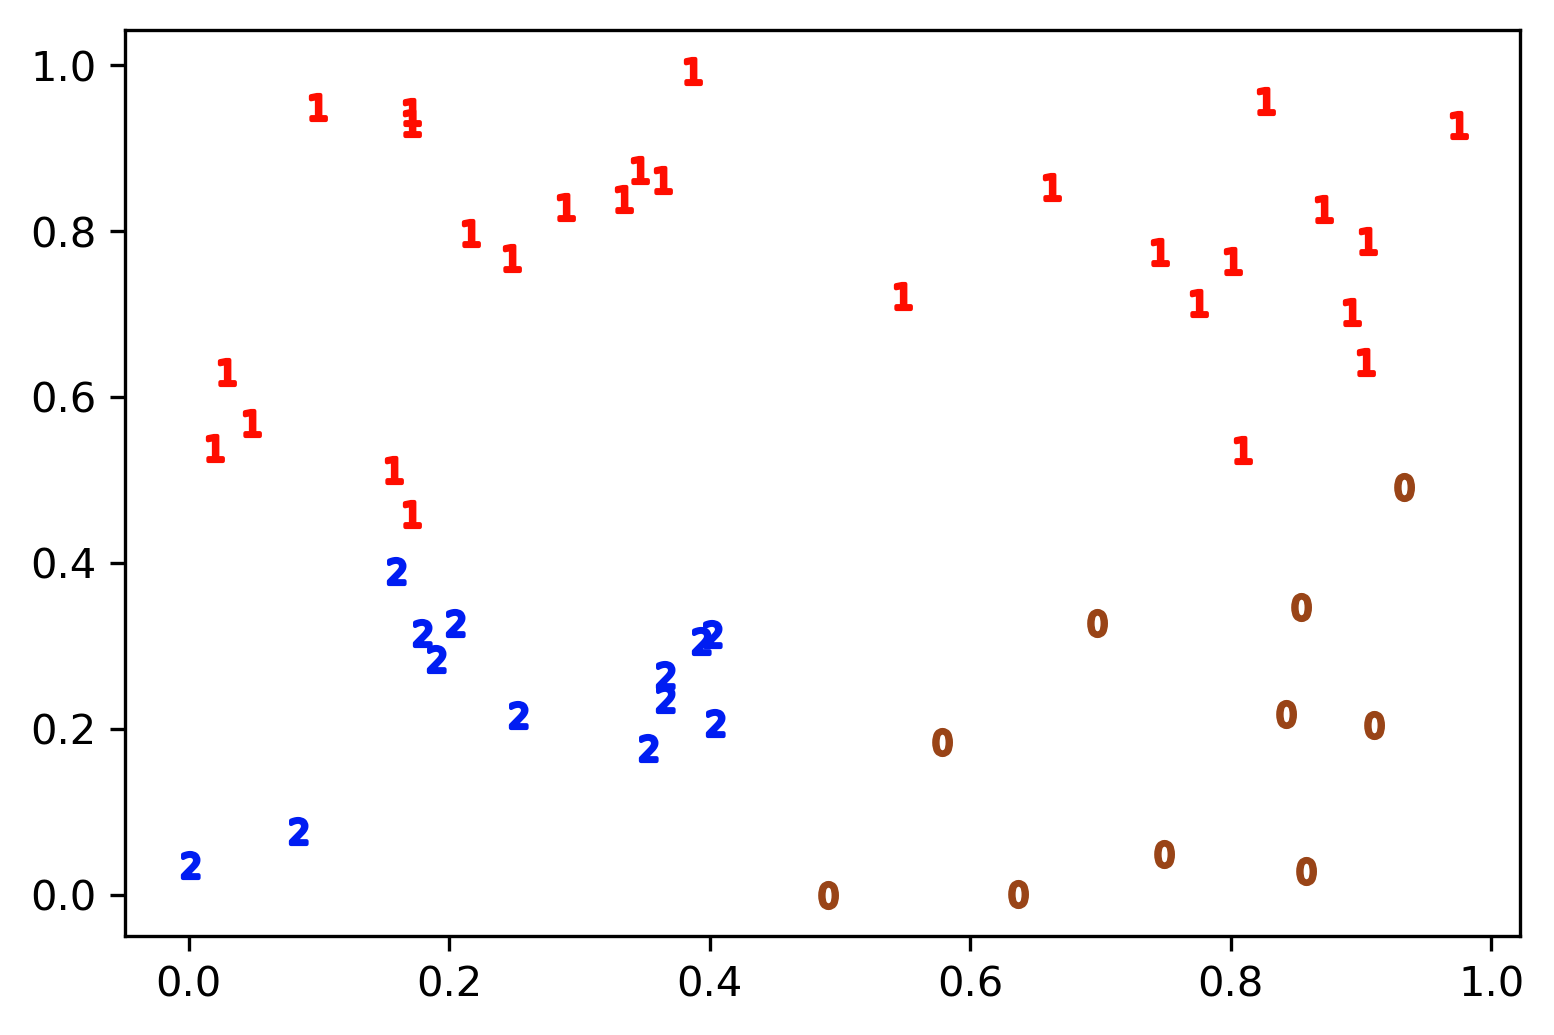

In [72]:
plot_the_clustering_2d(args.clusters_num, a[0], x[0], 'show')

In [73]:
ind_c = np.squeeze(np.argwhere(a == 1))

/Users/masong/PycharmProjects/GNNClustering/visualisation.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  clusters_fig.show()


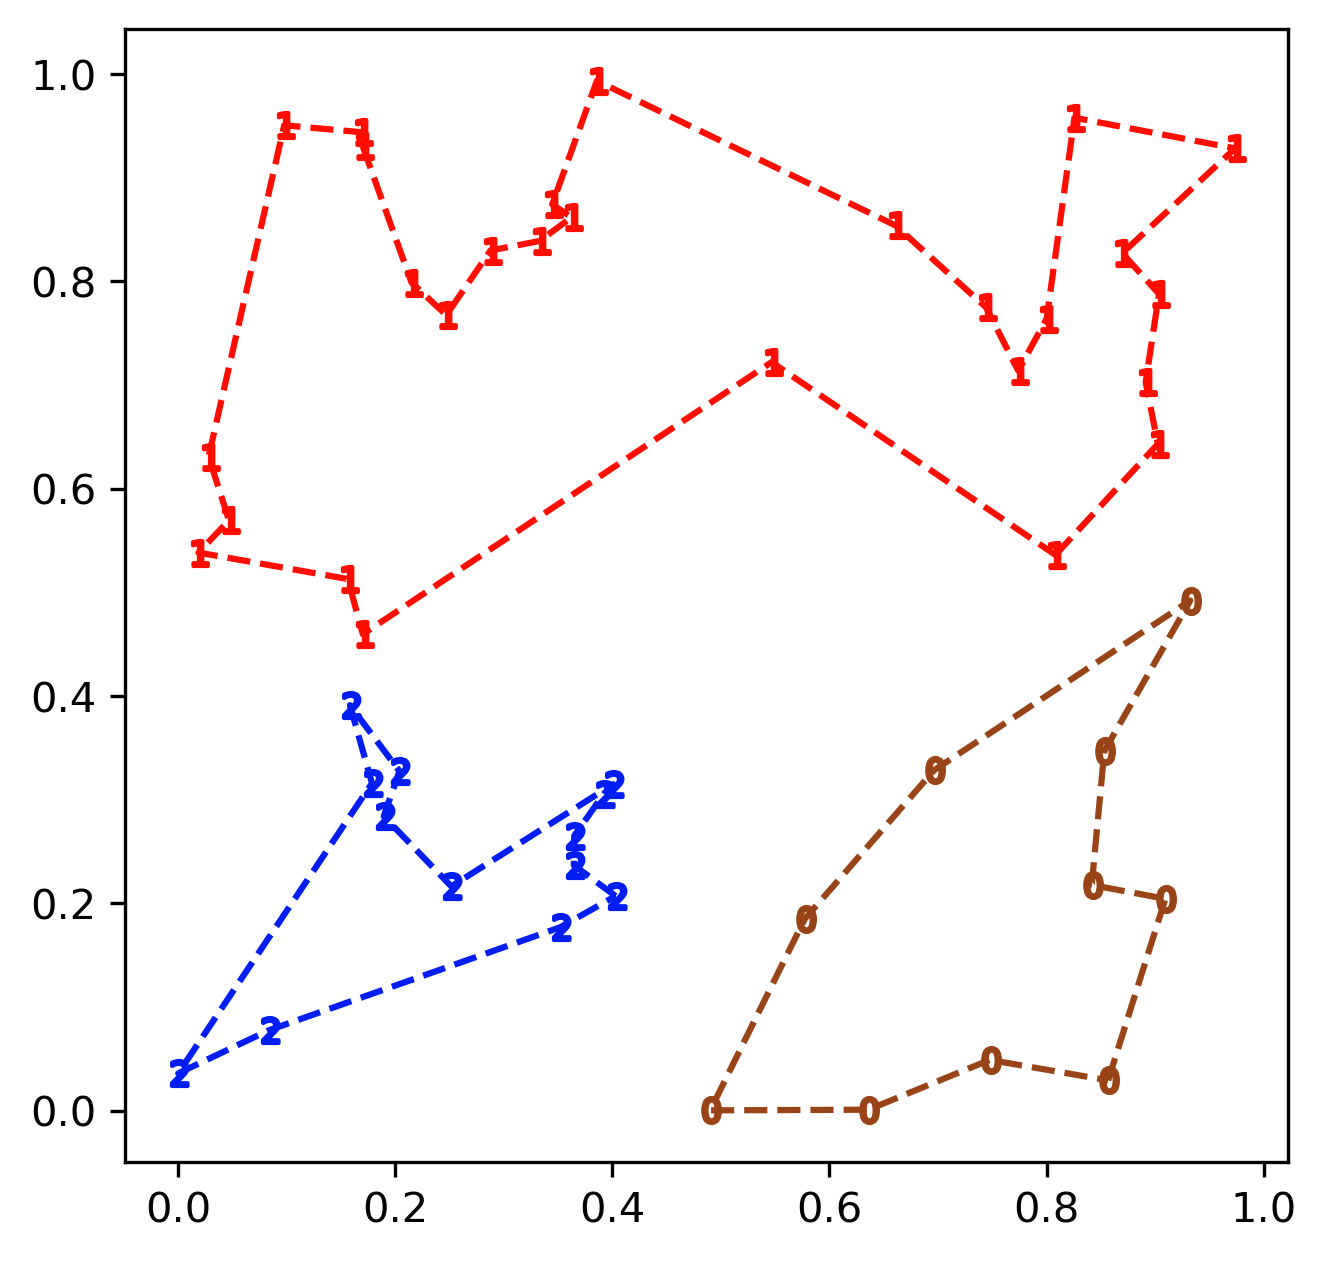

In [74]:
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], draw_cycle=True, pi=pi, showcase_mode='show')

In [75]:
sum(c_d), sum(c_d_origin), degeneration_flag

(6.348353981971741, 6.348353981971741, None)

In [76]:
max(c_d), max(c_d_origin), degeneration_flag

(3.3636267, 3.3636267, None)

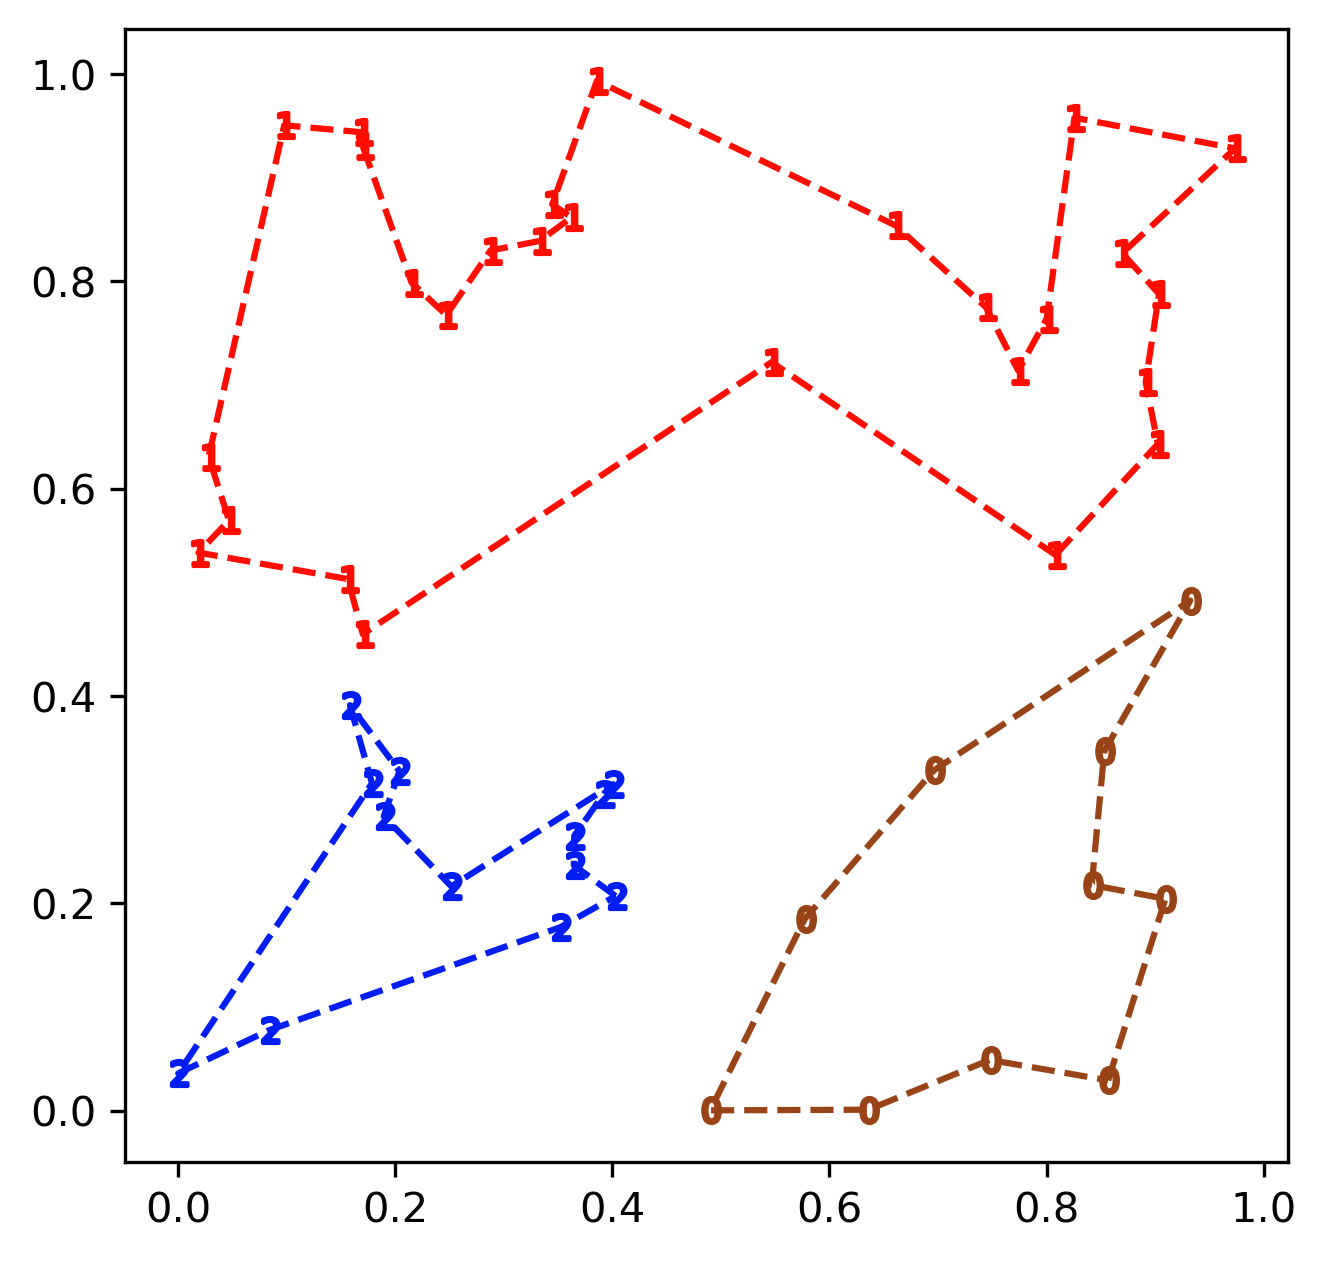

In [77]:
plot_the_clustering_2d_with_cycle(args.clusters_num, a[0], x[0], draw_cycle=True, pi=pi, showcase_mode='save', save_path='/Users/masong')

In [78]:
np.save('/home/masong/Desktop/x.npy', x.numpy())

FileNotFoundError: [Errno 2] No such file or directory: '/home/masong/Desktop/x.npy'

In [ ]:
plt.figure(figsize=[5.0, 5.0], dpi=300.0)
plot_the_clustering_2d(args.clusters_num, a[0], x[0], 'save', save_path='/Users/masong')
